# **M1 KIVA Data Exploration**

## **Table of Contents**

 * I. Import Libraries and Data

 * II. Data Preparation

 * III. Descriptive Data Analysis 
 
 * IV. Exploritary Data Analysis (EDA)

### Description and motivation
This page contains an exploratory data analysis (EDA) of the KIVA loans dataset with visualizations to give a brief understanding of what the Dataset contains and what it is about. 

It has been chosen to include only the top 20 countries with the most loans, rather than including all countries, as it is beneficial for both exploratory data analysis (EDA) and building a supervised machine learning (SML) model to predict loans. 

By concentrating on the top 20 countries, the data becomes more reliable and representative of overall trends, ensuring that the insights drawn from the analysis and the predictions made by the model are more accurate. Including countries with very few loans introduces noise and sparse data, which may lead to less meaningful patterns and impact the model's performance. 

Additionally, narrowing the scope to the most relevant countries reduces the complexity of the model, making it easier to interpret and less prone to overfitting. This approach also ensures more efficient resource allocation, as the majority of loan activity occurs in these countries, making the insights and predictions more actionable for practical business use.

Overall, focusing on these key countries leads to a more effective EDA and an SML model that delivers clearer insights and better predictions.

## I: Import Libraries and Data


In [71]:
# install all requried libraries from requirement file (-r flag) and running in silent mode using -q flag
!pip install -q -r https://raw.githubusercontent.com/JAdamHub/M1-Exam-Submission/refs/heads/main/requirements.txt

In [72]:
#import libraries
import pandas as pd             # for data manipulation
import numpy as np              # for mathematical operations
import matplotlib.pyplot as plt # for plotting
import seaborn as sns           # for data visualization
from scipy.stats import zscore  # for standardizing data & removing outliers

# libraries for importing data from github
import requests                 # used for importing data
import io                       # used for converting response content to a file-like object for pandas

# library used for gender mapping
import re

In [73]:
# definition of url-paths for datasets
url1 = 'https://raw.githubusercontent.com/JAdamHub/M1-Exam-Submission/refs/heads/main/data/kiva_loans_part_0.csv'
url2 = 'https://raw.githubusercontent.com/JAdamHub/M1-Exam-Submission/refs/heads/main/data/kiva_loans_part_1.csv'
url3 = 'https://raw.githubusercontent.com/JAdamHub/M1-Exam-Submission/refs/heads/main/data/kiva_loans_part_2.csv'

# loading the urls into requests to download data
print("Downloading data... 1/3")
response1 = requests.get(url1)
print("Downloading data... 2/3")
response2 = requests.get(url2)
print("Downloading data... 3/3")
response3 = requests.get(url3)

# convert the response content to a file-like object for pandas using io.StringIO
# the advantage of StringIO is that it allows us to import the data without having to save it as a file for pandas
data_part1 = pd.read_csv(io.StringIO(response1.text))
data_part2 = pd.read_csv(io.StringIO(response2.text))
data_part3 = pd.read_csv(io.StringIO(response3.text))

print("Data downloaded & imported.")


Data downloaded & imported.


## II: Data Preparation

In [74]:
# We can see, that the imported loan dataset consists of 3 parts. We will like to combine these to one dataset
data = pd.concat([data_part1, data_part2, data_part3])

In [75]:
# Show the first rows
data.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [76]:
# Dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 671205 entries, 0 to 221204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-null  in

In [77]:
#Check to find columns with missing data
data.isna().sum()


id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                     4232
country_code               8
country                    0
region                 56800
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48331
term_in_months             0
lender_count               0
tags                  171416
borrower_genders        4221
repayment_interval         0
date                       0
dtype: int64

We can see, that alot of data is missing from the tags column. That column is not relevant along with column 'use', since that column consists of alot of qualitative data. As well as 'currency' and 'country_code' And it will be dropped.

In [78]:
data = data.drop(['tags', 'use', 'currency', 'country_code', 'partner_id'], axis=1)

In [79]:
# we want to remove the missing rows from the dataset
# storing length of rows for comparing, >> before dropna.. <<
data_rows = len(data)

# dropping missing values
data.dropna(inplace=True)

# storing the now cleaned dataset
cleaned_rows = len(data)

# check..
drops = data_rows - cleaned_rows

# print the dropped rows and percentage of data removed
print(f"Number of dropped rows: {drops}")
print(f'In percentage {(drops / data_rows) * 100:.2f} % of the data was removed')
# check after cleaning
data.isna().sum()

Number of dropped rows: 97078
In percentage 14.46 % of the data was removed


id                    0
funded_amount         0
loan_amount           0
activity              0
sector                0
country               0
region                0
posted_time           0
disbursed_time        0
funded_time           0
term_in_months        0
lender_count          0
borrower_genders      0
repayment_interval    0
date                  0
dtype: int64

### Gender Mapping (creating groups of male, female, and mixed gender groups)

In [80]:
# Step 1: Count the number of male and female borrowers
# In the dataset, 'borrower_genders' contains strings that indicate the genders of the borrowers.
# This part of the code will look for occurrences of 'male' and 'female' in that column.

# Searching for 'male' in the 'borrower_genders' column and counting occurrences
data['male_borrowers'] = data['borrower_genders'].apply(lambda x: len(re.findall(r'\bmale', x)))

# Searching for 'female' in the 'borrower_genders' column and counting occurrences
data['female_borrowers'] = data['borrower_genders'].apply(lambda x: len(re.findall(r'\bfemale', x)))

# Step 2: Calculate the total number of borrowers for each loan
# We add the number of male and female borrowers together to get the total borrower count for each loan.
data['borrowers_count'] = data['male_borrowers'] + data['female_borrowers']

# Step 3: Handle cases where there are no borrowers recorded (borrowers_count = 0).
# In such cases, we replace the 'borrowers_count' with 1 to avoid any division by zero errors later.
data['borrowers_count'] = data['borrowers_count'].replace(0, 1)

# Step 4: Calculate the ratio of male borrowers to the total number of borrowers.
# This ratio will help us classify the gender groups later.
data['male_borrower_ratio'] = data['male_borrowers'] / data['borrowers_count']

# Step 5: Define a function to classify the gender group based on the male-to-total ratio.
# If the ratio is 1, all borrowers are male, so we return 'male(s)'.
# If the ratio is 0, all borrowers are female, so we return 'female(s)'.
# Otherwise, we return 'mixed gender group' for cases where both male and female borrowers exist.
def classify_genders(ratio):
    if ratio == 1:
        return 'male(s)'  # All borrowers are male
    elif ratio == 0:
        return 'female(s)'  # All borrowers are female
    else:
        return 'mixed gender group'  # Borrowers are a mix of male and female

# Step 6: Apply the classification function to the calculated 'male_borrower_ratio'.
# This will add a new column 'gender_class' that tells us if the group is 'male(s)', 'female(s)', or 'mixed gender group'.
data['gender_class'] = data['male_borrower_ratio'].apply(classify_genders)

# Step 7: Check the results by printing the first 10 rows of the new columns.
# Here, we display the 'borrower_genders', male and female counts, total borrower count, male borrower ratio, and gender classification.
data[['borrower_genders', 'male_borrowers', 'female_borrowers', 'borrowers_count', 'male_borrower_ratio', 'gender_class']].head(10)


,borrower_genders,male_borrowers,female_borrowers,borrowers_count,male_borrower_ratio,gender_class
0,female,0,1,1,0.0,female(s)
1,"female, female",0,2,2,0.0,female(s)
2,female,0,1,1,0.0,female(s)
3,female,0,1,1,0.0,female(s)
4,female,0,1,1,0.0,female(s)
6,female,0,1,1,0.0,female(s)
7,female,0,1,1,0.0,female(s)
8,female,0,1,1,0.0,female(s)
9,female,0,1,1,0.0,female(s)
10,female,0,1,1,0.0,female(s)


### Removing outliers based on loan_amount

In [81]:
# Step 1: Calculate Z-scores for detecting outliers in loan_amount
# Z-scores show how far each value is from the average in terms of standard deviations.
z_scores = zscore(data['loan_amount'])

# Step 2: Identify outliers using Z-scores greater than 2 or less than -2 (captures 95% of data)
data['outlier_loan_amount'] = (z_scores > 2) | (z_scores < -2)

# Step 3: Remove outliers from the dataset
# Keep only rows where 'outlier_loan_amount' is False.
data_clean = data[~data['outlier_loan_amount']]

# Step 4: Count how many outliers we detected
data['outlier_loan_amount'].sum()


23129

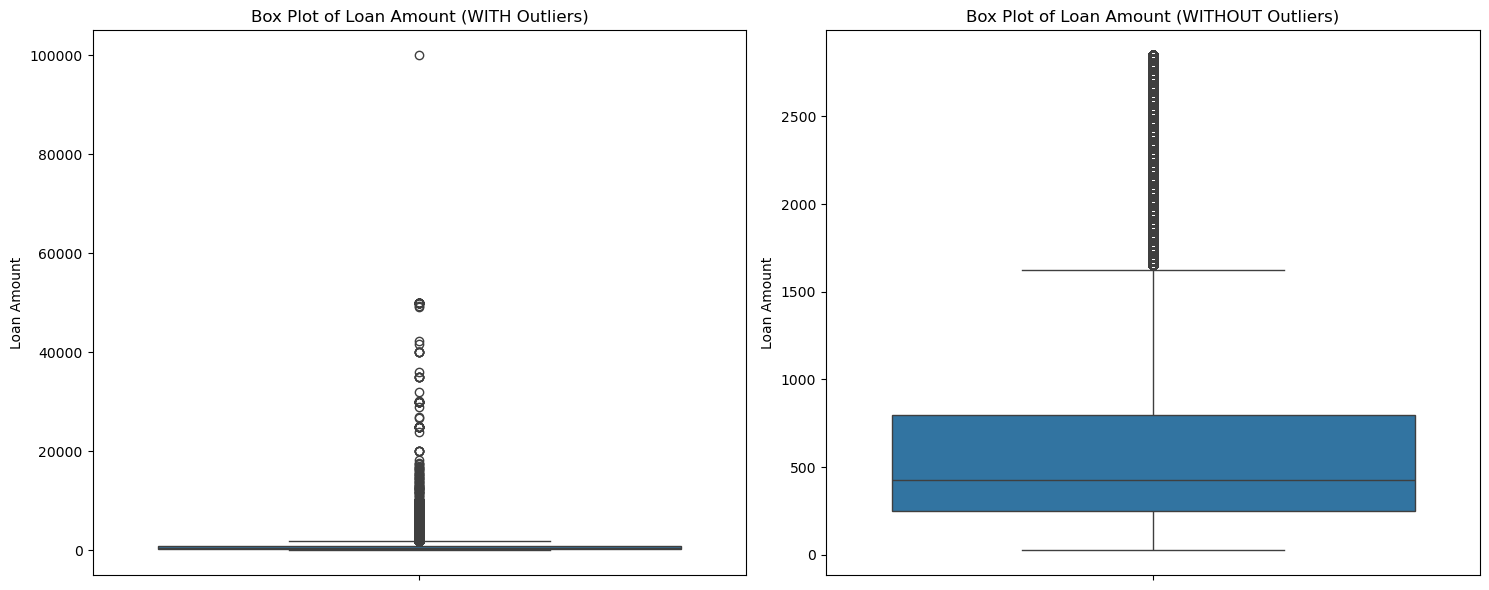

Summary statistics - original data (loan_amount):
count    574127.000000
mean        758.391567
std        1051.554879
min          25.000000
25%         250.000000
50%         450.000000
75%         900.000000
max      100000.000000
Name: loan_amount, dtype: float64

Summary statistics - cleaned data (loan_amount):
count    550998.000000
mean        601.934490
std         507.332615
min          25.000000
25%         250.000000
50%         425.000000
75%         800.000000
max        2850.000000
Name: loan_amount, dtype: float64


In [82]:
# Step 1: Create a figure with two subplots side by side (1 row, 2 columns)
# We will use this to compare loan amounts with and without outliers visually
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Step 2: Boxplot for the original data (WITH outliers)
# This plot shows the loan amount distribution including any extreme outliers
sns.boxplot(data=data, y='loan_amount', ax=ax1)
ax1.set_title('Box Plot of Loan Amount (WITH Outliers)')  # Adding a title for clarity
ax1.set_ylabel('Loan Amount')  # Label the y-axis

# Step 3: Boxplot for the cleaned data (WITHOUT outliers)
# This plot shows the loan amount distribution after removing outliers
sns.boxplot(data=data_clean, y='loan_amount', ax=ax2)
ax2.set_title('Box Plot of Loan Amount (WITHOUT Outliers)')  # Title for comparison
ax2.set_ylabel('Loan Amount')  # Label the y-axis

# Step 4: Adjust the layout and display the plot
# This ensures the plots are properly spaced and displayed
plt.tight_layout()
plt.show()

# Step 5: Print summary statistics for comparison
# Now, we'll print out the summary statistics to compare the differences between the original and cleaned datasets
print("Summary statistics - original data (loan_amount):")
print(data['loan_amount'].describe())  # Statistics for the original data with outliers
print("\nSummary statistics - cleaned data (loan_amount):")
print(data_clean['loan_amount'].describe())  # Statistics for the cleaned data without outliers


## III: Descriptive Statistics

Text(0.5, 1.0, 'loan_amount')

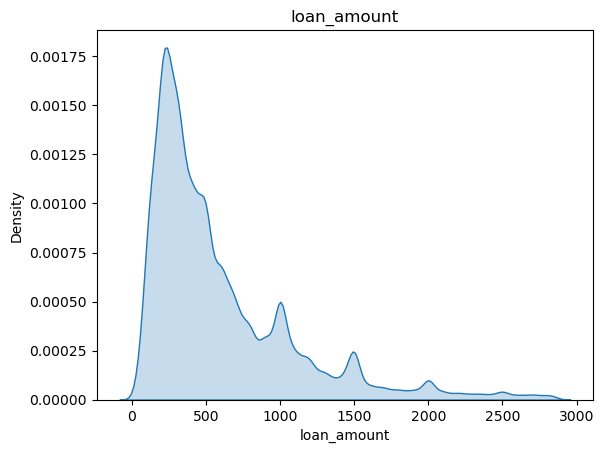

In [83]:
sns.kdeplot(data_clean['loan_amount'], label='loan_amount', fill=True).set_title('loan_amount')

In [84]:
data_clean[['loan_amount', 'funded_amount', 'term_in_months']].describe().T


,count,mean,std,min,25%,50%,75%,max
loan_amount,550998.0,601.934490,507.332615,25.0,250.0,425.0,800.0,2850.0
funded_amount,550998.0,601.934490,507.332615,25.0,250.0,425.0,800.0,2850.0
term_in_months,550998.0,13.407176,8.139459,2.0,8.0,13.0,14.0,141.0


In [85]:
# what is the total amount of loan_amount for each country?
country_loans = data_clean.groupby('country')['loan_amount'].sum()

# we would like a classic top 20 to get an overview of the
country_top_20 = country_loans.sort_values(ascending=False).head(20)

print(country_top_20)

country
Philippines    53296250.0
Kenya          26560750.0
Cambodia       17734975.0
Peru           16879250.0
Ecuador        12079400.0
Tajikistan     11988550.0
Uganda         11594500.0
Pakistan       11581200.0
El Salvador    10657050.0
Vietnam         9887975.0
Colombia        9834225.0
Palestine       9235550.0
Lebanon         8330075.0
Nicaragua       7773325.0
Armenia         7717075.0
Paraguay        7445975.0
Kyrgyzstan      5953125.0
Bolivia         5684550.0
Mali            5664575.0
Guatemala       5346350.0
Name: loan_amount, dtype: float64


In [86]:
# getting top 20
data_top_20 = data_clean[data_clean['country'].isin(country_top_20.index)]

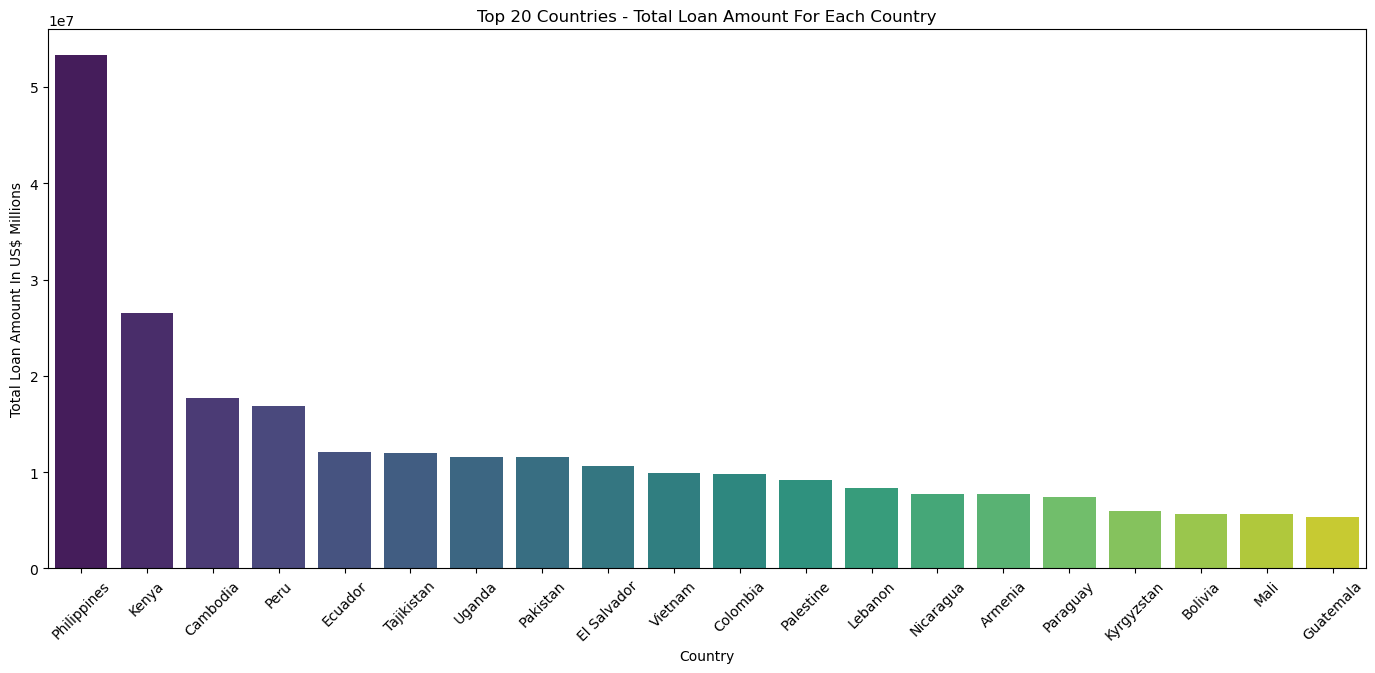

In [87]:
# Step 1: Set up the figure size for the bar plot
plt.figure(figsize=(17, 7))  # This makes the plot wider for better readability

# Step 2: Create a bar plot for the top 20 countries by total loan amount
# We're using country names on the x-axis and the total loan amount on the y-axis
sns.barplot(x=country_top_20.index, y=country_top_20.values, hue=country_top_20.index, palette="viridis")

# Step 3: Add a title and labels for better understanding
plt.title('Top 20 Countries - Total Loan Amount For Each Country')  # Add a title
plt.xlabel('Country')  # Label the x-axis
plt.ylabel('Total Loan Amount In US$ Millions')  # Label the y-axis

# Step 4: Rotate the x-axis labels for better readability
# This makes sure the country names don't overlap
plt.xticks(rotation=45)

# Step 5: Show the plot
plt.show()  # Display the bar plot


In [88]:
correlation_data = data_top_20[['funded_amount', 'loan_amount', 'lender_count', 'term_in_months']]

correlation_matrix = correlation_data.corr(method='spearman')

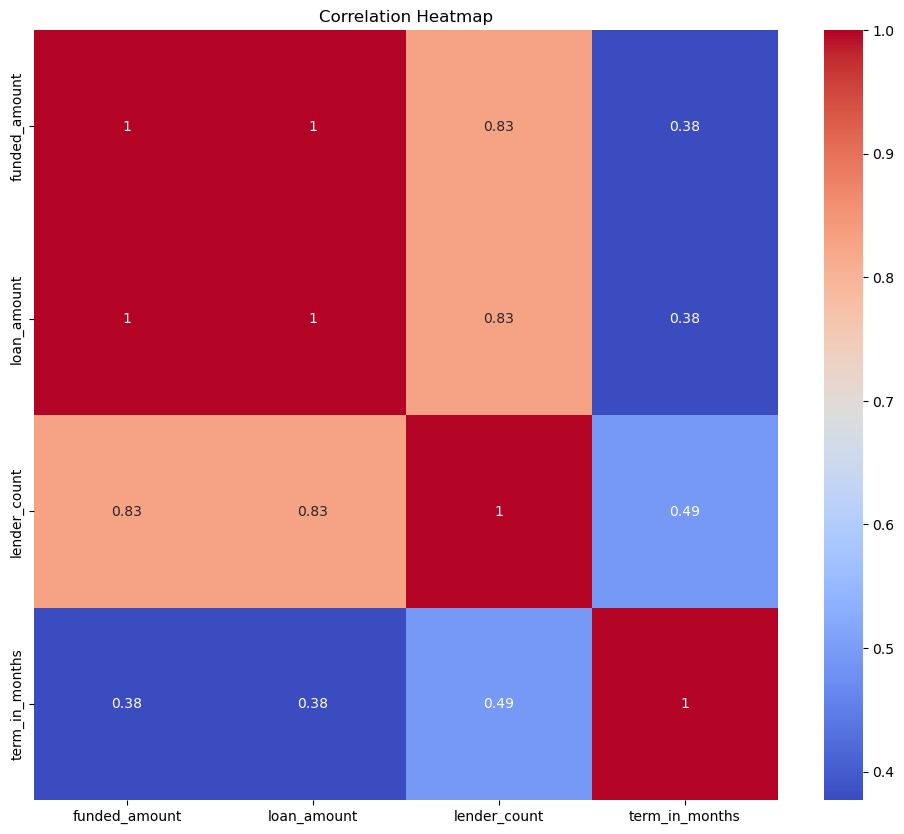

In [89]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## IV: Exploratory Data Analysis (EDA)

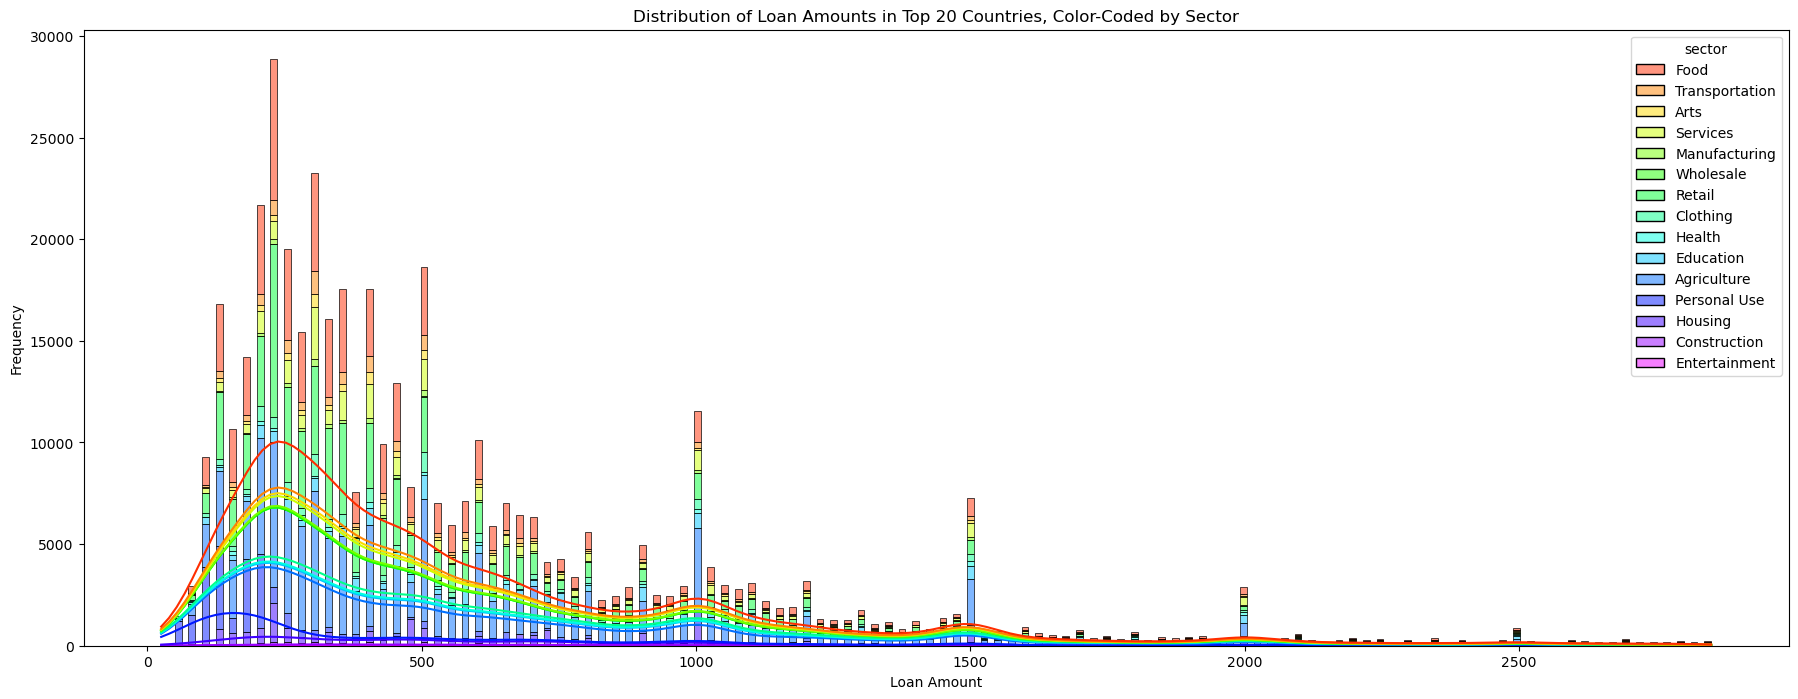

In [90]:
# Step 1: Calculate the mean and median loan amounts for the top 20 countries
# This helps us understand the average and middle loan amounts in the top 20 countries.
mean_loan = data_top_20['loan_amount'].median()
median_loan = data_top_20['loan_amount'].mean()

# Step 2: Create a histogram to visualize the distribution of loan amounts by sector
# We're using a stacked histogram to see how loan amounts are distributed across different sectors.
plt.figure(figsize=(22, 8))  # Set a wide figure size to fit the data nicely

# Step 3: Plot the distribution of loan amounts, color-coded by sector
sns.histplot(data_top_20, x='loan_amount', hue='sector', multiple='stack', kde=True, palette='gist_rainbow')

# Step 4: Add a title and axis labels for clarity
plt.title('Distribution of Loan Amounts in Top 20 Countries, Color-Coded by Sector')  # Add a title
plt.xlabel('Loan Amount')  # Label the x-axis
plt.ylabel('Frequency')  # Label the y-axis

# Step 5: Show the plot
plt.show()  # Display the histogram


In [91]:
sector_stat = data_top_20.groupby('sector')['loan_amount'].describe().T
print(sector_stat)

sector    Agriculture         Arts      Clothing  Construction     Education  \
count   126978.000000  7469.000000  16366.000000   4071.000000  22289.000000   
mean       621.185953   604.953809    706.912196    719.982805    821.253757   
std        493.091915   517.255859    547.239060    496.661310    562.385914   
min         25.000000    50.000000     25.000000     50.000000     25.000000   
25%        275.000000   300.000000    300.000000    325.000000    400.000000   
50%        450.000000   425.000000    500.000000    600.000000    675.000000   
75%        825.000000   700.000000   1000.000000   1000.000000   1075.000000   
max       2850.000000  2850.000000   2850.000000   2775.000000   2850.000000   

sector  Entertainment          Food       Health       Housing  Manufacturing  \
count      477.000000  86204.000000  5676.000000  18583.000000    4670.000000   
mean       750.314465    533.739734   807.866455    596.247915     651.488223   
std        523.068080    462.868578 

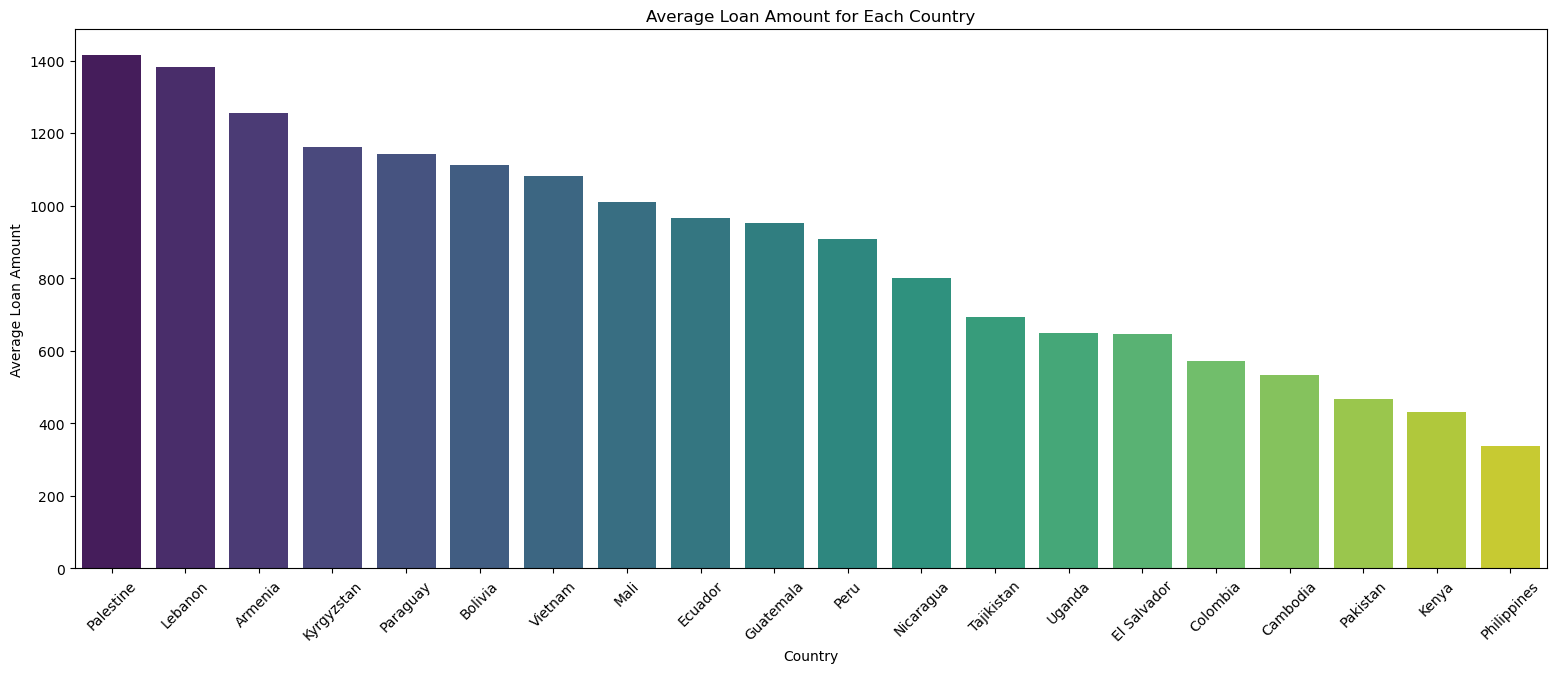

In [92]:
# calculate the average loan amount for each top 20 country
# we group the data by country and find the mean loan amount for each
average_loans_by_country = data_top_20.groupby('country')['loan_amount'].mean()

# sort the countries from highest to lowest average loan amounts
# this allows us to easily see which countries have the highest average loan amounts
average_loans_by_country = average_loans_by_country.sort_values(ascending=False)

# create a bar plot to visualize the average loan amount by country
plt.figure(figsize=(19, 7))  # a wide figure size to fit all country names clearly

# plot the average loan amount for each country with color based on the country
sns.barplot(x=average_loans_by_country.index, y=average_loans_by_country.values, hue=average_loans_by_country.index, palette='viridis')

# add a title and labels to the plot for clarity
plt.title('Average Loan Amount for Each Country')  # add a title
plt.xlabel('Country')  # label the x-axis
plt.ylabel('Average Loan Amount')  # label the y-axis

# rotate the x-axis labels by 45 degrees to avoid overlap
plt.xticks(rotation=45)

# show the plot
plt.show() 


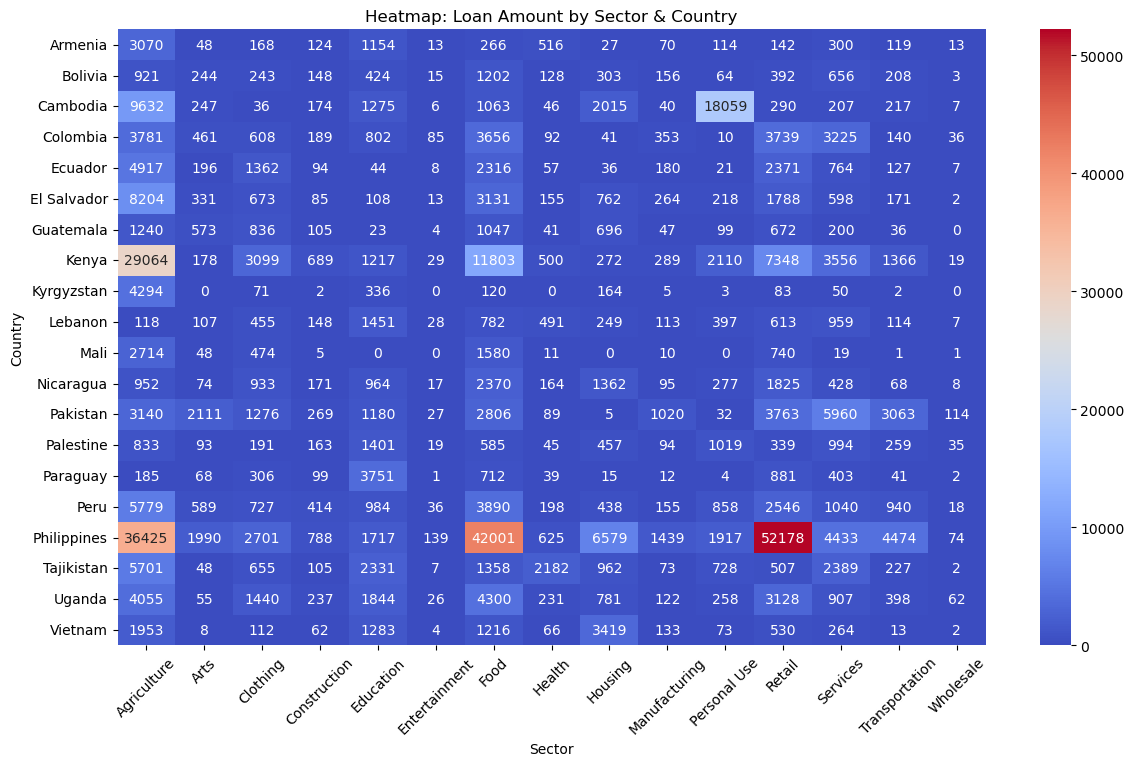

In [93]:
# create a pivot table for the heatmap
# we organize the data by country and sector, counting the number of loans for each combination
outcome_heatmap_data = data_top_20.pivot_table(index='country', columns='sector', values='loan_amount', aggfunc='count', fill_value=0)

# plot the heatmap to visualize the loan distribution by country and sector
plt.figure(figsize=(14, 8))  # set the figure size for better visibility

# create the heatmap, showing the loan counts with color intensity
sns.heatmap(outcome_heatmap_data, annot=True, fmt="d", cmap="coolwarm")  # display the counts with annotations

# add title and labels for clarity
plt.title('Heatmap: Loan Amount by Sector & Country')  # add a title
plt.xlabel('Sector')  # label the x-axis
plt.ylabel('Country')  # label the y-axis
plt.xticks(rotation=45)  # rotate the x-axis labels for better readability

# show the plot
plt.show()  # display the heatmap


/var/folders/z7/j9rhznl118zbt_41ygz3rgyc0000gn/T/ipykernel_89349/3359979025.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_top_20['funded_time'] = pd.to_datetime(data_top_20['funded_time'])


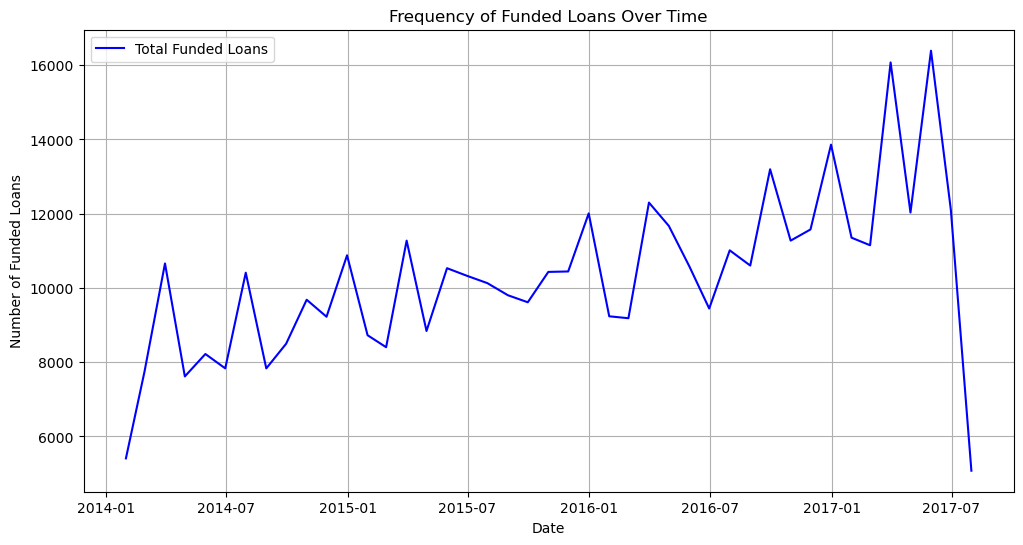

In [94]:
# convert the 'funded_time' column to datetime format
# this ensures we can work with dates correctly
data_top_20['funded_time'] = pd.to_datetime(data_top_20['funded_time'])

# set 'funded_time' as the index of the dataframe
# this allows us to resample and analyze data over time
data_top_20.set_index('funded_time', inplace=True)

# resample the data to a monthly frequency
# we're grouping the data by month to see how many loans were funded each month
funded_trend = data_top_20.resample('ME').size()  # 'ME' stands for month-end

# plot the trend of funded loans over time
plt.figure(figsize=(12, 6))  # set figure size
plt.plot(funded_trend, label='Total Funded Loans', color='blue')  # plot the number of loans per month

# reset the index to bring 'funded_time' back as a column
# we do this to avoid any issues with the original dataframe later on
data_top_20.reset_index(inplace=True)

# add title and labels for clarity
plt.title('Frequency of Funded Loans Over Time')  # add a title
plt.xlabel('Date')  # label the x-axis
plt.ylabel('Number of Funded Loans')  # label the y-axis
plt.legend()  # add a legend
plt.grid(True)  # add a grid for easier interpretation

# show the plot
plt.show()  # display the plot